# Tracking of object height (altitude)

In this task, we will track the height of a climbing accelerating object. Denote the acceleration by $a$, the initial velocity $v_0$ and the initial height by $y_0 = 0$. It holds

$$
    y_t = v_0 t + \frac{1}{2} a t^2 + \varepsilon_t, \qquad \text{iid}\quad \varepsilon_t \sim \mathcal{N}(0, \sigma^2).
$$

We will model this sequentially, i.e., at time instants $t=1, t=2, \ldots$, when we incorporate new measurement $y_t$ and regressor $x_t$ into the prior. We aim to estimate:
- $\beta = [\beta_1, \beta_2]^\intercal = [v_0, a]$ - regression coefficients,
- $\sigma^2$ - noise variance.

Since we assume the noise to be normally distributed, the model is normal too,

$$
y_t \sim \mathcal{N}(\beta^\intercal x_t, \sigma^2).
$$

We will use the conjugate *normal inverse-gamma* prior distribution (why?).

In [1]:
import sys
sys.path.insert(0, '../zdrojaky')

import numpy as np
import matplotlib.pylab as plt
from nig import NiG                        # NiG prior class

We load the data and **need to determine their number**.

In [3]:
y = np.load('c1-tracking.npz')['y']

#---------------------------------------------
# Determine the number of measurements
ndat = y.size
#---------------------------------------------
print('There are {0} measurements'.format(ndat))
print('Their shape is: ', y.shape)

There are 80 measurements
Their shape is:  (80,)


Let us plot the data evolution

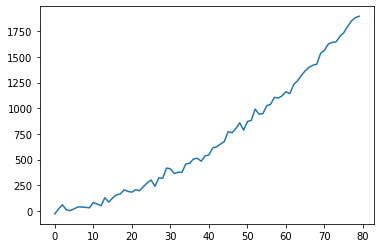

In [5]:
#---------------------------------------------
# Plot y using matplotlib.pylab imported above
# ***
#---------------------------------------------

x=np.arange(0, ndat, 1)
plt.plot(x, y)

plt.show()

Sequential estimation follows. Recall that

$$
y_t = v_0 t + \frac{1}{2} a t^2 + \varepsilon_t =
\underbrace{
\begin{bmatrix}
v_0 \\
a
\end{bmatrix}^\intercal
}_{\beta^\intercal}
\underbrace{
\begin{bmatrix}
t \\
\frac{1}{2}t^2
\end{bmatrix}
}_{x_t}
+ \varepsilon_t.
$$

In [9]:
xi0 = np.diag([10000, .1, .1])   # Prior xi_0
nu0 = 5.                         # Prior nu_0
regmodel = NiG(xi0, nu0)         # NiG object

for t in range(ndat):
    yt = y[t]
    ##############################################
    # x_t should be a correct regressor
    # (recall, python indexes from 0 while
    # in physics t=1,2,...
    xt = np.array([t+1, 0.5*(t+1)**2])
    ##############################################
    
    regmodel.update(yt, xt)      # update of the prior
    regmodel.log()               # logging

The posterior estimates are:

In [10]:
print('Final estimate of beta: ', regmodel.Ebeta)
print('Final estimate of sigma2: ', regmodel.Esigma2)
print('Var(beta): ', regmodel.var_beta)
print('Var(sigma2): ', regmodel.var_sigma2)

Final estimate of beta:  [3.9532584  0.50229204]
Final estimate of sigma2:  889.6947313075863
Var(beta):  [8.18825138e-02 8.42456514e-05]
Var(sigma2):  19544.610244851312


Plot the estimates. **Try to modify so that it plots the steady state, i.e., the learning period is skipped.**

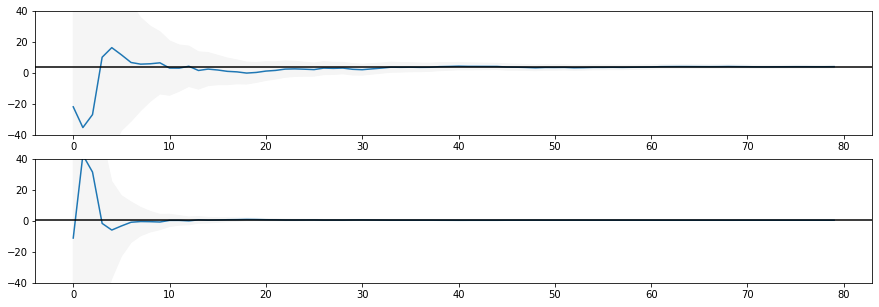

In [20]:
Ebeta_log = np.array(regmodel.Ebeta_log)
std_beta_log = np.sqrt(np.array(regmodel.var_beta_log))

plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(Ebeta_log[:, 0])
plt.axhline(regmodel.Ebeta[0], color='black')
plt.fill_between(np.arange(ndat),
                 Ebeta_log[:, 0] + 3 * std_beta_log[:, 0],
                 Ebeta_log[:, 0] - 3 * std_beta_log[:, 0],
                 color='whitesmoke'
                 )
plt.ylim(-40, 40)

plt.subplot(212)
plt.plot(Ebeta_log[:, 1])
plt.axhline(regmodel.Ebeta[1], color='black')
plt.fill_between(np.arange(ndat),
                 Ebeta_log[:, 1] + 3 * std_beta_log[:, 1],
                 Ebeta_log[:, 1] - 3 * std_beta_log[:, 1],
                 color='whitesmoke'
                 )
plt.ylim(-40, 40)
plt.show()

(-2500, 2500)

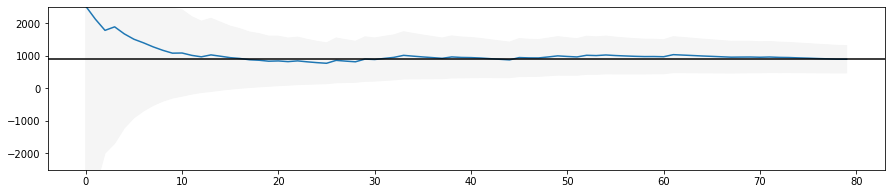

In [19]:
std_sigma2_log = np.sqrt(np.array(regmodel.var_sigma2_log))

plt.figure(figsize=(15, 3))
plt.plot(regmodel.Esigma2_log)
plt.axhline(regmodel.Esigma2, color='black')
plt.fill_between(np.arange(ndat),
                 np.array(regmodel.Esigma2_log) + 3. * std_sigma2_log,
                 np.array(regmodel.Esigma2_log) - 3. * std_sigma2_log,
                 color='whitesmoke'
                 )
plt.ylim(-2500, 2500)

The true values were:
   - v0 = 4
   - a = .5
   - sigma2 = 900
   
Add horizontal black lines into the respective plots above.